In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [119]:
from plot_config import *

In [46]:
bins = 50
binning = (slice(None,None,bins),slice(None,None,bins))

In [151]:
path2 = '/sciserver/filedb10-02/ocean/wenrui_temp/table_domain_all/'
print(len(os.listdir(path2))/161)

path1 = '/sciserver/filedb10-01/ocean/wenrui_temp/table_dec11'

import os
print(len(os.listdir(path1)))

print(len([i for i in os.listdir(path1) if 'slice(0' in i]))

print(len([i for i in os.listdir(path1) if 'slice(7' in i]))

lst = os.listdir(path1)
proc = np.arange(0,161)
slices = [slice(0,730), slice(730,1095)]
for s in slices:
    for p in proc:
        name = 'table'+str(p)+str(s)
        if name not in lst:
            print(p, end = ' ')
    print()

7.0
322
161
161




In [ ]:
path = '/sciserver/filedb10-01/ocean/wenrui_temp/table_domain5/'
lst = os.listdir(path)
print(len(os.listdir(path)))

In [33]:
slices = []
for i in range(5):
    slices.append(str(slice(i*730,(i+1)*730)))
slices

['slice(0, 730, None)',
 'slice(730, 1460, None)',
 'slice(1460, 2190, None)',
 'slice(2190, 2920, None)',
 'slice(2920, 3650, None)']

In [59]:
subs = []
offsets = [i*730 for i in range(5)]
for slid in range(5): 
    strslice = slices[slid]
    sub_name = ['table'+str(i)+strslice for i in range(0,161)]
    for name in sub_name:
        if name not in lst:
            print(name)
    datasets = [xr.open_zarr(path+name) for name in sub_name]
    
    sub = xr.concat(datasets,dim = 'time')

    sub['space']=sub.space+offsets[slid]
    subs.append(sub)

In [60]:
ds = xr.concat(subs,dim = 'space')

In [ ]:
# plt.imshow(ds.A_nace[binning])

# plt.imshow(ds.A_gdbk[binning])

# plt.imshow(ds.A_egrl[binning])

# plt.imshow(ds.A_labr[binning])

In [75]:
# plt.imshow(ds.F_nace[binning])

# plt.imshow(ds.F_gdbk[binning])

# plt.imshow(ds.F_egrl[binning])

# plt.imshow(ds.F_labr[binning])

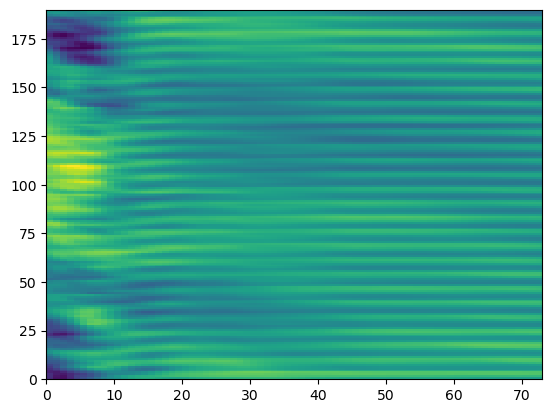

In [68]:
plt.pcolormesh(ds.sf[binning])

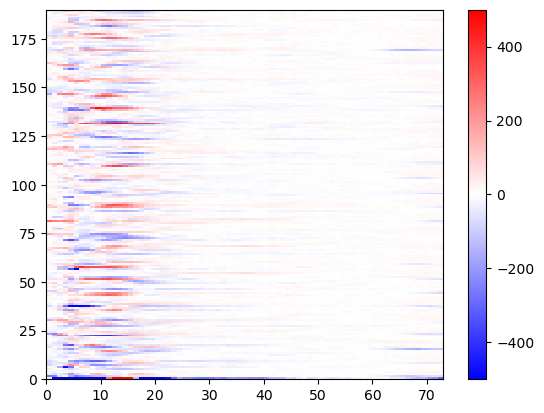

In [146]:
plt.pcolormesh(ds.dif_v[binning],vmax = 500,vmin = -500,cmap = 'bwr')
plt.colorbar()

In [148]:
big_ecco

NameError: name 'big_ecco' is not defined

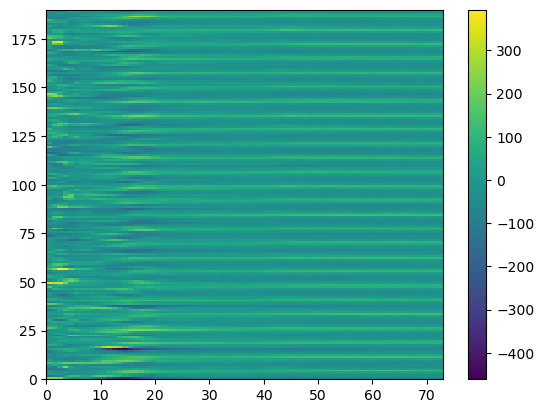

In [90]:
plt.pcolormesh(ds.F[binning])
plt.colorbar()

In [94]:
box_plot = {}
for var in ds.data_vars:
    if '_' in var:
        print(var)
        box_plot[var] = np.array(ds[var].mean(dim = 'space'))

A_egrl
A_gdbk
A_gulf
A_labr
A_nace
E_egrl
E_gdbk
E_gulf
E_labr
E_nace
F_egrl
F_gdbk
F_gulf
F_labr
F_nace
I_egrl
I_gdbk
I_gulf
I_labr
I_nace
dif_h
dif_h_egrl
dif_h_gdbk
dif_h_gulf
dif_h_labr
dif_h_nace
dif_v
dif_v_egrl
dif_v_gdbk
dif_v_gulf
dif_v_labr
dif_v_nace
e_ua
e_ua_egrl
e_ua_gdbk
e_ua_gulf
e_ua_labr
e_ua_nace


In [117]:
# ticks = []
# for var in ds.data_vars:
#     if 'gdbk' in var:
#         print(var)
#         # plt.boxplot(box_plot[var],showfliers = False)
# plt.plot([0.5,1.5],[0,0])

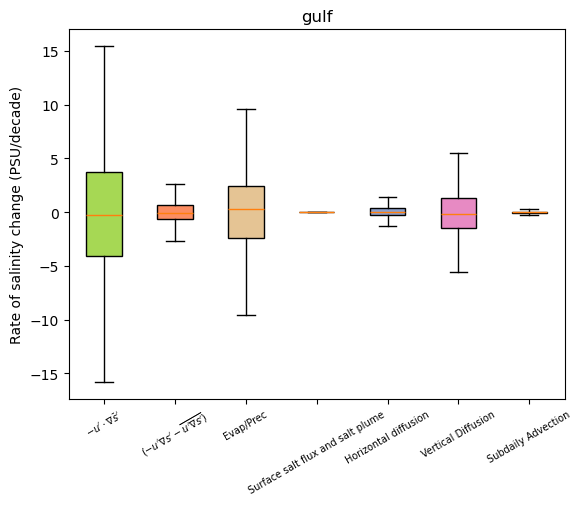

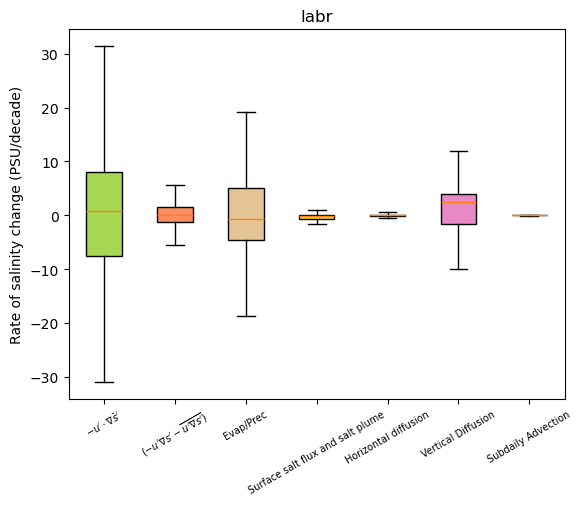

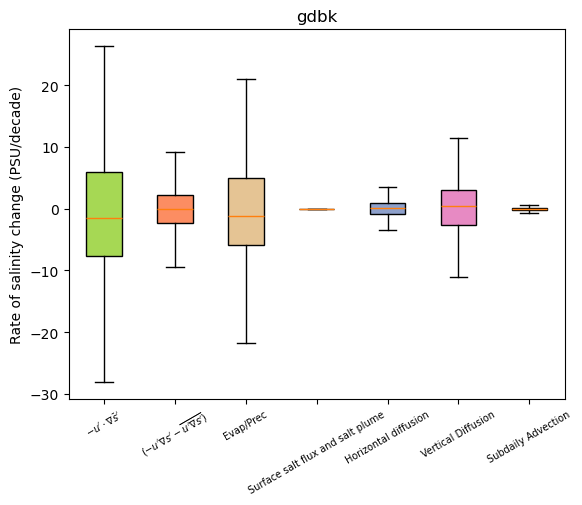

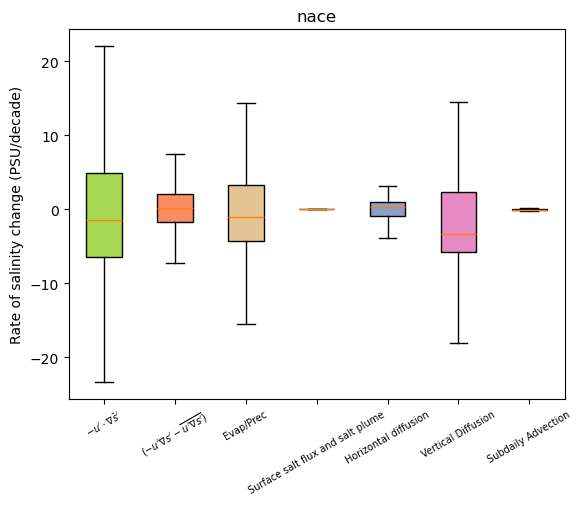

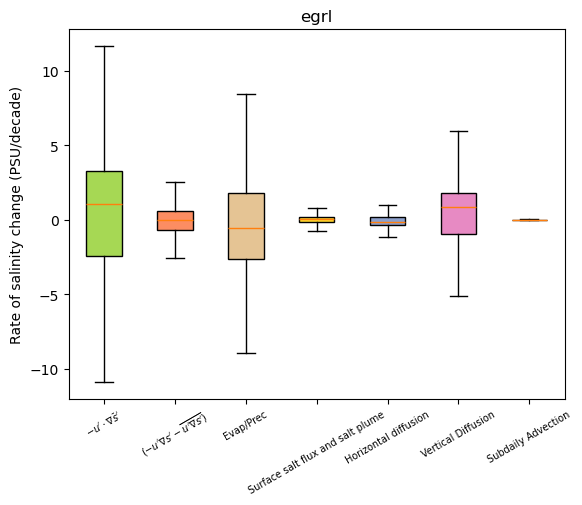

In [143]:
for a_region in region_names:
    labels = [term_dic[i[:-5]] for i in box_plot.keys() if a_region in i]
    data = [box_plot[i] for i in box_plot.keys() if a_region in i] 
    colors = [color_dic[i[:-5]] for i in box_plot.keys() if a_region in i]
    
    thing = plt.boxplot(data, labels=labels, patch_artist=True,showfliers = False)
    for patch, color in zip(thing['boxes'], colors):
        patch.set_facecolor(color)
    plt.xticks(fontsize = 7,rotation = 30)
    plt.ylabel('Rate of salinity change (PSU/decade)')
    plt.title(a_region)
    # plt.yscale('symlog')
    plt.show()

In [110]:
# plt.violinplot(box_plot['E_gdbk'],showmeans = True)

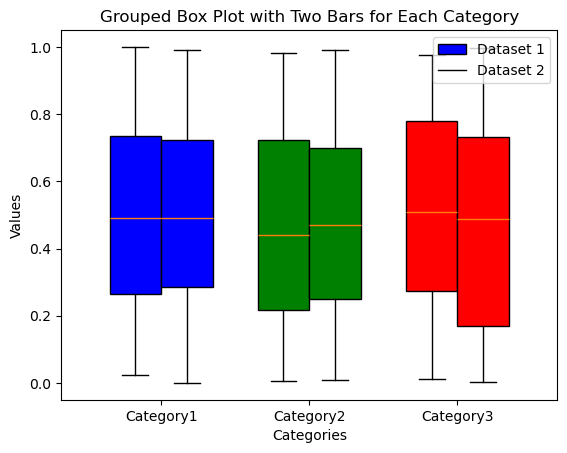

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: Replace this with your dictionaries of numpy arrays
data_dict1 = {
    'Category1': np.random.rand(100),
    'Category2': np.random.rand(100),
    'Category3': np.random.rand(100),
}

data_dict2 = {
    'Category1': np.random.rand(100),
    'Category2': np.random.rand(100),
    'Category3': np.random.rand(100),
}

# Categories and colors
categories = list(data_dict1.keys())
colors = ['blue', 'green', 'red']

# Extract data for each category
data1 = [data_dict1[category] for category in categories]
data2 = [data_dict2[category] for category in categories]

# Width of the bars
bar_width = 0.35

# Set up positions for bars
positions1 = np.arange(len(categories))
positions2 = positions1 + bar_width

# Create grouped box plot
thing1 = plt.boxplot(data1, positions=positions1, widths=bar_width, patch_artist=True, boxprops=dict(facecolor='lightgray'))
thing2 = plt.boxplot(data2, positions=positions2, widths=bar_width, patch_artist=True, boxprops=dict(facecolor='lightgray'))

# Customize box colors
for patch, color in zip(thing1['boxes'], colors):
    patch.set_facecolor(color)

for patch, color in zip(thing2['boxes'], colors):
    patch.set_facecolor(color)

# Set labels and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Box Plot with Two Bars for Each Category')
plt.xticks(positions1 + bar_width / 2, categories)
plt.legend(['Dataset 1', 'Dataset 2'])

# Show the plot
plt.show()

In [133]:
patch

'whiskers'

In [82]:
slices = []
for i in range(10):
    slices.append(str(slice(i*365,(i+1)*365)))
slices
lst2 = os.listdir(path2)

In [85]:
subs = []
offsets = [i*365 for i in range(10)]
for slid in range(3,10): 
    strslice = slices[slid]
    sub_name = ['table'+str(i)+strslice for i in range(0,161)]
    for name in sub_name:
        if name not in lst2:
            print(name)
    datasets = [xr.open_zarr(path2+name) for name in sub_name]
    
    sub = xr.concat(datasets,dim = 'time')

    sub['space']=sub.space+offsets[slid]
    subs.append(sub)

In [86]:
dsa = xr.concat(subs,dim = 'space')

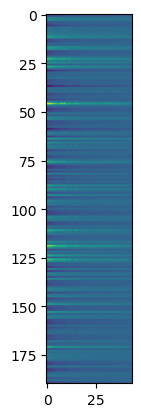

In [87]:
plt.imshow(dsa.F_egrl[binning])

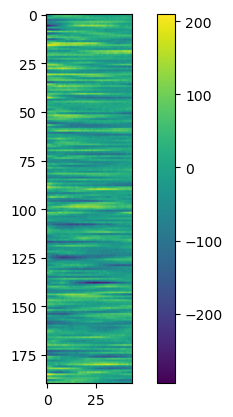

In [89]:
plt.imshow(dsa.E[binning])
plt.colorbar()

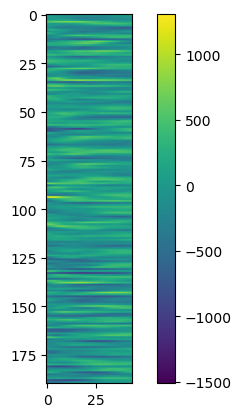

In [91]:
plt.imshow(dsa.A[binning])
plt.colorbar()

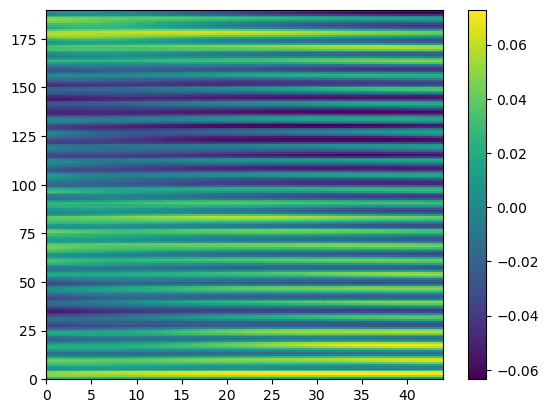

In [114]:
plt.pcolormesh(dsa.sf[binning])
plt.colorbar()